In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
#read data
routes = pd.read_csv('routes_final.csv')
routes.head()

,Route ID,Start City,Start Date,Greedy Route,Optimal Route,Greedy Price,Optimal Price,Target Audience,Region,Subregion,Month,Trip ID,Greedy Distance,Optimal Route Distance
0,1,PARIS,2025-07-01,"['BARCELONA', 'IBIZA', 'LISBON', 'SPLIT', 'BER...","['BARCELONA', 'LISBON', 'BERLIN', 'IBIZA', 'SP...",722.01,660.24,YOUNG,EUROPE,WEST,JULY,A,6122.17,8501.00
1,2,PARIS,2025-08-01,"['BARCELONA', 'IBIZA', 'LISBON', 'SPLIT', 'BER...","['BARCELONA', 'LISBON', 'BERLIN', 'IBIZA', 'SP...",949.49,836.46,YOUNG,EUROPE,WEST,AUGUST,A,6122.17,8501.00
2,3,PARIS,2025-07-01,"['NICE', 'ROME', 'MAJORCA', 'IBIZA', 'MYKONOS']","['MAJORCA', 'MYKONOS', 'IBIZA', 'ROME', 'NICE']",772.90,670.43,YOUNG,EUROPE,WEST,JULY,B,6493.99,7243.73
3,4,PARIS,2025-08-01,"['NICE', 'ROME', 'MAJORCA', 'IBIZA', 'MYKONOS']","['MAJORCA', 'IBIZA', 'MYKONOS', 'ROME', 'NICE']",1338.91,707.53,YOUNG,EUROPE,WEST,AUGUST,B,6493.99,5634.91
4,5,TAMPA,2025-07-01,"['FORT LAUDERDALE', 'MIAMI', 'WASHINGTON', 'NE...","['FORT LAUDERDALE', 'NEW YORK CITY', 'MIAMI', ...",1501.52,887.77,YOUNG,USA,EAST,JULY,C,4372.41,7950.58


In [98]:
#print the possible values for the columns: target audience, region, subregion,month
print("Target Audience", routes['Target Audience'].unique())
print("Region", routes['Region'].unique())
print("Subregion", routes['Subregion'].unique())
print("Month", routes['Month'].unique())


Target Audience ['YOUNG' 'ELDER']
Region ['EUROPE' 'USA']
Subregion ['WEST' 'EAST']
Month ['JULY' 'AUGUST']


In [99]:
#compare greedy price with optimal price

print(f"Number of instances: {routes.shape[0]}")


unique_routes = routes['Trip ID'].unique()
print(f"Number of unique routes: {unique_routes.shape[0]}")

greedy_greater_count = routes[routes['Greedy Price'] > routes['Optimal Price']].shape[0]

print(f"Greedy Price was higher than the Optimal Price in {greedy_greater_count} instances.")



Number of instances: 22
Number of unique routes: 11
Greedy Price was higher than the Optimal Price in 22 instances.


In [100]:
#checking how many times the optimal route is the reverse of the greedy route

def is_reverse(route1, route2):
    route1_list = eval(route1)
    route2_list = eval(route2)
    return route1_list == route2_list[::-1]

routes['Is Reverse'] = routes.apply(lambda row: is_reverse(row['Greedy Route'], row['Optimal Route']), axis=1)
reverse_cases = routes[routes['Is Reverse']]

print(f"Total cases where Optimal Route is the reverse of Greedy Route: {len(reverse_cases)}\n")
for _, row in reverse_cases.iterrows():
    start_city = row['Start City']
    greedy_route = " → ".join(eval(row['Greedy Route']))
    optimal_route = " → ".join(eval(row['Optimal Route']))
    
    print(f"Case:")
    print(f"Route ID        {row['Route ID']}")
    print(f"Target Audience {row['Target Audience']}")
    print(f"Region          {row['Region']}")
    print(f"Subregion       {row['Subregion']}")
    print(f"Month           {row['Month']}\n")
    print(f"Greedy Route    {start_city} → {greedy_route} → {start_city}")
    print(f"Optimal Route   {start_city} → {optimal_route} → {start_city}")


Total cases where Optimal Route is the reverse of Greedy Route: 1

Case:
Route ID        21
Target Audience ELDER
Region          USA
Subregion       WEST
Month           JULY

Greedy Route    SANTA BARBARA → PALM SPRINGS → JACKSON HOLE, WYOMING → PORTLAND, OREGON → NAPA VALLEY → CHICAGO → SANTA BARBARA
Optimal Route   SANTA BARBARA → CHICAGO → NAPA VALLEY → PORTLAND, OREGON → JACKSON HOLE, WYOMING → PALM SPRINGS → SANTA BARBARA


In [101]:
#checking when the same trip but in different months has different routes

#grouping the data by 'Trip ID' to compare the 'Optimal Route' across different months
trip_groups = routes.groupby('Trip ID')

same_routes = 0
different_routes = 0

#iterate through each trip group to compare 'Optimal Route'
for trip_id, group in trip_groups:
    unique_routes = group['Optimal Route'].unique()
    
    if len(unique_routes) == 1:  # All routes are the same
        same_routes += 1
        
        start_city = group['Start City'].iloc[0]
        optimal_route = " → ".join(eval(unique_routes[0]))  
        
        print(f"Trip ID         {trip_id}")
        print(f"Optimal Route   {start_city} → {optimal_route} → {start_city}")
        print(f"Target Audience {group['Target Audience'].iloc[0]}")
        print(f"Region          {group['Region'].iloc[0]}")
        print(f"Subregion       {group['Subregion'].iloc[0]}\n")
   
    else:
        different_routes += 1  

# Print the summary
print(f"\nTrips with the same 'Optimal Route': {same_routes}")
print(f"Trips with different 'Optimal Route': {different_routes}")

Trip ID         A
Optimal Route   PARIS → BARCELONA → LISBON → BERLIN → IBIZA → SPLIT → PARIS
Target Audience YOUNG
Region          EUROPE
Subregion       WEST

Trip ID         G
Optimal Route   VIENNA → PORTO → BARCELONA → VENICE,ITALY → AIX-EN-PROVENCE → ROME → VIENNA
Target Audience ELDER
Region          EUROPE
Subregion       WEST


Trips with the same 'Optimal Route': 2
Trips with different 'Optimal Route': 9


Out of the 11 analyzed trips, 9 showed variations in the Optimal Route depending on the month (July or August). 
Only 2 trips maintained the same Optimal Route across both months.

In [102]:
#average price difference between greedy and optimal price
routes['Price Difference'] = routes['Greedy Price'] - routes['Optimal Price']
average_price_difference = routes['Price Difference'].mean()
print(f"Average price difference between Greedy and Optimal Price: {average_price_difference:.2f}")

Average price difference between Greedy and Optimal Price: 287.67


In [103]:
#average price difference between greedy and optimal price for each target audience
target_audience_groups = routes.groupby('Target Audience')
for target_audience, group in target_audience_groups:
    average_price_difference = group['Price Difference'].mean()
    print(f"Average price difference for {target_audience}: {average_price_difference:.2f}")
print()

#average price difference between greedy and optimal price for each region 
region_groups = routes.groupby('Region')
for region, group in region_groups:
    average_price_difference = group['Price Difference'].mean()
    print(f"Average price difference for {region}: {average_price_difference:.2f}")
print()

#average price difference between greedy and optimal price for each subregion when regoin is 'EUA'
region_groups = routes.groupby('Region')
subregion_groups = region_groups.get_group('USA').groupby('Subregion')
for subregion, group in subregion_groups:
    average_price_difference = group['Price Difference'].mean()
    print(f"Average price difference for {subregion}: {average_price_difference:.2f}")
print()

#average price difference between greedy and optimal price for each month
month_groups = routes.groupby('Month')
for month, group in month_groups:
    average_price_difference = group['Price Difference'].mean()
    print(f"Average price difference for {month}: {average_price_difference:.2f}")
print()



Average price difference for ELDER: 266.11
Average price difference for YOUNG: 305.65

Average price difference for EUROPE: 204.04
Average price difference for USA: 335.47

Average price difference for EAST: 476.64
Average price difference for WEST: 229.58

Average price difference for AUGUST: 301.45
Average price difference for JULY: 273.90



In [104]:
routes['Distance Difference'] = routes['Optimal Route Distance'] - routes['Greedy Distance']

#average Distance difference between greedy and optimal Distance for each target audience
target_audience_groups = routes.groupby('Target Audience')
for target_audience, group in target_audience_groups:
    average_Distance_difference = group['Distance Difference'].mean()
    print(f"Average Distance difference for {target_audience}: {average_Distance_difference:.2f}")
print()

#average Distance difference between greedy and optimal Distance for each region 
region_groups = routes.groupby('Region')
for region, group in region_groups:
    average_Distance_difference = group['Distance Difference'].mean()
    print(f"Average Distance difference for {region}: {average_Distance_difference:.2f}")
print()

#average Distance difference between greedy and optimal Distance for each subregion when regoin is 'EUA'
region_groups = routes.groupby('Region')
subregion_groups = region_groups.get_group('USA').groupby('Subregion')
for subregion, group in subregion_groups:
    average_Distance_difference = group['Distance Difference'].mean()
    print(f"Average Distance difference for {subregion}: {average_Distance_difference:.2f}")
print()

#average Distance difference between greedy and optimal Distance for each month
month_groups = routes.groupby('Month')
for month, group in month_groups:
    average_Distance_difference = group['Distance Difference'].mean()
    print(f"Average Distance difference for {month}: {average_Distance_difference:.2f}")
print()


Average Distance difference for ELDER: 362.19
Average Distance difference for YOUNG: 1601.86

Average Distance difference for EUROPE: 992.84
Average Distance difference for USA: 1064.39

Average Distance difference for EAST: 2515.64
Average Distance difference for WEST: -24.04

Average Distance difference for AUGUST: 862.41
Average Distance difference for JULY: 1214.34



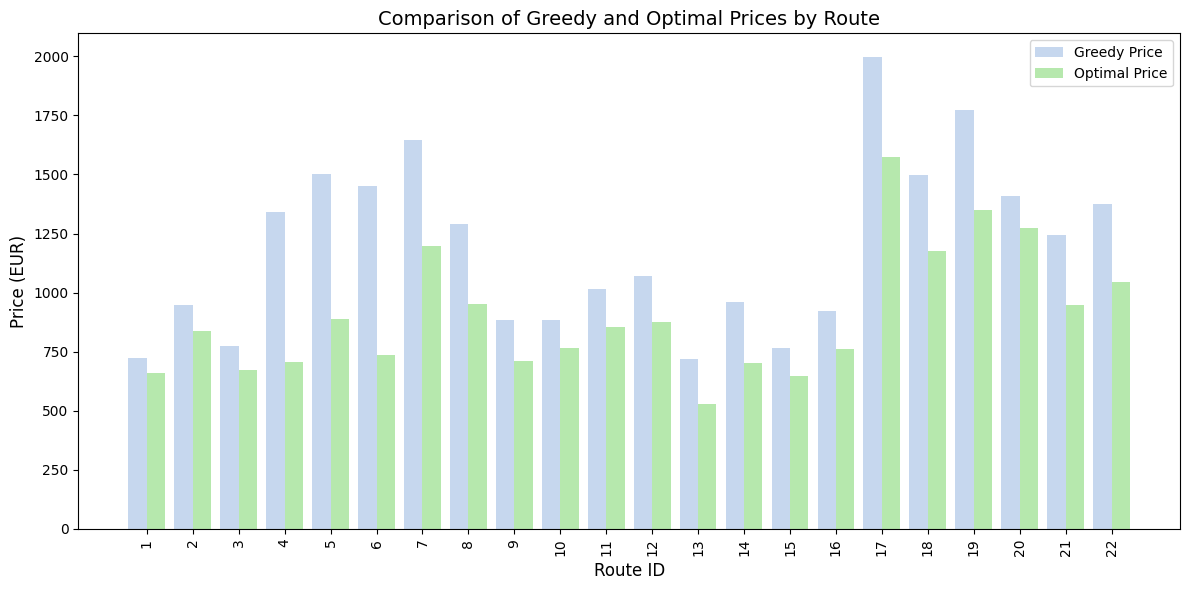

In [ ]:
file_path = "routes_final.csv"
data = pd.read_csv(file_path)

# Set the positions for the bars
bar_width = 0.4
indices = np.arange(len(data['Route ID']))

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(indices - bar_width / 2, data['Greedy Price'], width=bar_width, label='Greedy Price', color='#aec7e8', alpha=0.7)
plt.bar(indices + bar_width / 2, data['Optimal Price'], width=bar_width, label='Optimal Price', color='#98df8a', alpha=0.7)

plt.title("Comparison of Greedy and Optimal Prices by Route", fontsize=14)
plt.xlabel("Route ID", fontsize=12)
plt.ylabel("Price (EUR)", fontsize=12)
plt.xticks(indices, data['Route ID'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


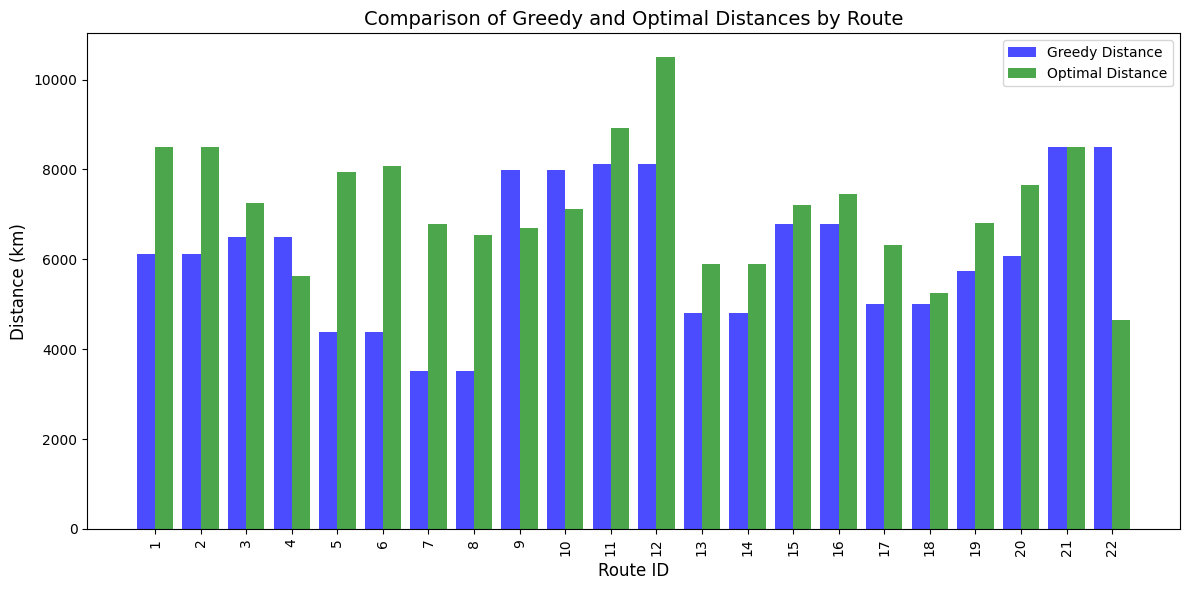

In [106]:
# Set the positions for the bars
bar_width = 0.4
indices = np.arange(len(data['Route ID']))

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(indices - bar_width / 2, data['Greedy Distance'], width=bar_width, label='Greedy Distance', color='blue', alpha=0.7)
plt.bar(indices + bar_width / 2, data['Optimal Route Distance'], width=bar_width, label='Optimal Distance', color='green', alpha=0.7)

plt.title("Comparison of Greedy and Optimal Distances by Route", fontsize=14)
plt.xlabel("Route ID", fontsize=12)
plt.ylabel("Distance (km)", fontsize=12)
plt.xticks(indices, data['Route ID'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [107]:
routes['Price Difference'] = routes['Greedy Price'] - routes['Optimal Price']
average_price_difference = routes['Price Difference'].mean()
print(f"Average price difference between Greedy and Optimal Price: {average_price_difference:.2f}")

routes['Distance Difference'] = routes['Optimal Route Distance'] - routes['Greedy Distance']
average_distance_difference = routes['Distance Difference'].mean()
print(f"Average distance difference between Greedy and Optimal Route: {average_distance_difference:.2f}")

Average price difference between Greedy and Optimal Price: 287.67
Average distance difference between Greedy and Optimal Route: 1038.37


In [114]:
print(abs(routes['Distance Difference']).min())
print(routes['Distance Difference'].max())

0.0
3697.9700000000003


In [108]:
routes['Price Difference'] = routes['Greedy Price'] - routes['Optimal Price']
#calculate the std of the price difference
price_difference_std = routes['Price Difference'].std()
print(f"Price difference std between Greedy and Optimal Price: {price_difference_std:.2f}")

Price difference std between Greedy and Optimal Price: 187.19


In [111]:
routes['Distance Difference'] = routes['Optimal Route Distance'] - routes['Greedy Distance']
#calculate the std of the distance difference
distance_difference_std = routes['Distance Difference'].std()
print(f"Distance difference std between Greedy and Optimal Route: {distance_difference_std:.2f}")

Distance difference std between Greedy and Optimal Route: 1787.86


In [110]:
km_per_euro = average_distance_difference / average_price_difference
print(f"Average distance per euro: {km_per_euro:.2f} km")

Average distance per euro: 3.61 km
